**Import packages**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
visa_df=pd.read_csv(r"C:\Users\surya\NareshIT\ EDA_python\Visadataset - Visadataset.csv")
print(visa_df.shape[0])
print(visa_df.shape[1])
visa_df


25480
12


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Bi variate analysis**
- Analyse the two variables
- Two categorical columns
- Two numerical columns
 

**categorical vs categorical**

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Continent-case_status**

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Q1) How many Asia people got the visa certified**   
**Q2)How many asia people got the visa denied**

In [8]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])
print(f'The Number of employees visa certified are:{len(visa_df[con])}')

The Number of employees visa certified are:11012


In [9]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Denied')
con=con1&con2
len(visa_df[con])

5849

In [10]:
#certified
l1=[]
l2=[]
unique1=visa_df['continent'].unique()
for i in unique1:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Certified')
    con=con1&con2
    ln=len(visa_df[con])
    l1.append(ln)
    #print(f'The Number of {i} employees visa certified are:{len(visa_df[con])}')  
for i in unique1:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Denied')
    con=con1&con2
    len(visa_df[con])
    l2.append(len(visa_df[con]))
l1,l2
    

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [11]:
l1=[]
l2=[]
unique1=visa_df['continent'].unique()
for i in unique1:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Certified')
    con3=(visa_df['case_status']=='Denied')
    certi_con=con1&con2
    den_con=con1&con3
    ln=len(visa_df[certi_con])
    lm=len(visa_df[den_con])
    l1.append(ln)
    l2.append(lm)
df=pd.DataFrame(zip(l1,l2),index=unique1,columns=['certified_data','Denied_data'])
df


,certified_data,Denied_data
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross Tab**
- cross tab will take 2 argument
   - first arguments : Index
   - second arguments : columns


In [12]:
#result1
col1=visa_df['continent']
col2=visa_df['case_status']
res2=(pd.crosstab(col2,col1))
res2


continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [13]:
#result2
col1=visa_df['continent']
col2=visa_df['case_status']
res1=(pd.crosstab(col1,col2))
res1


case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

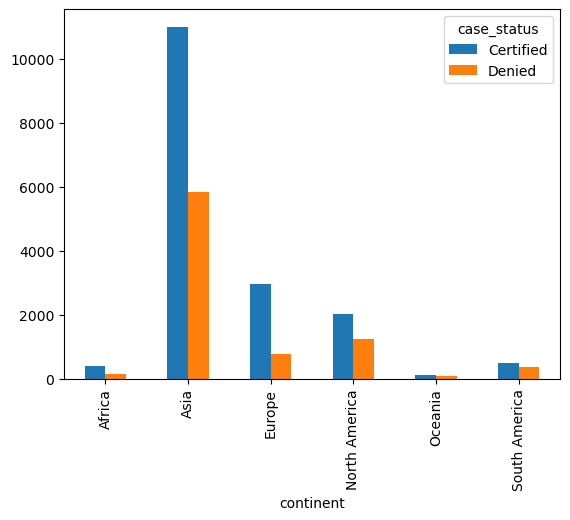

In [14]:
res1.plot(kind='bar')

<Axes: xlabel='case_status'>

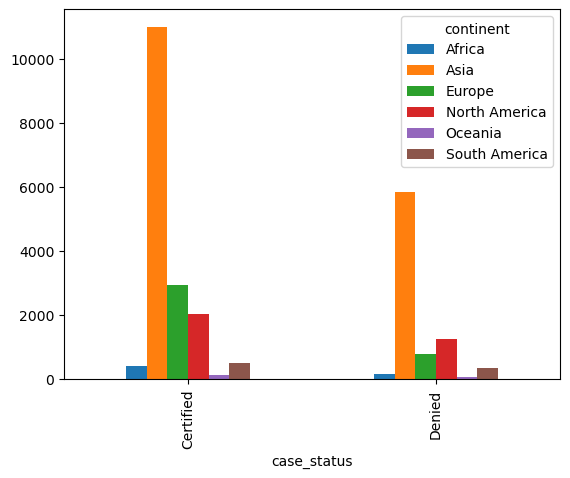

In [15]:
res2.plot(kind='bar')

<Axes: xlabel='case_status'>

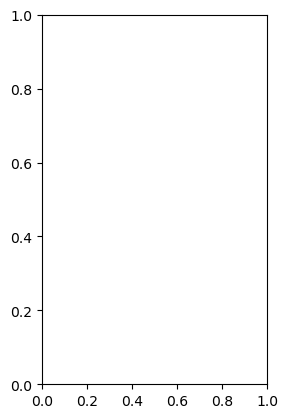

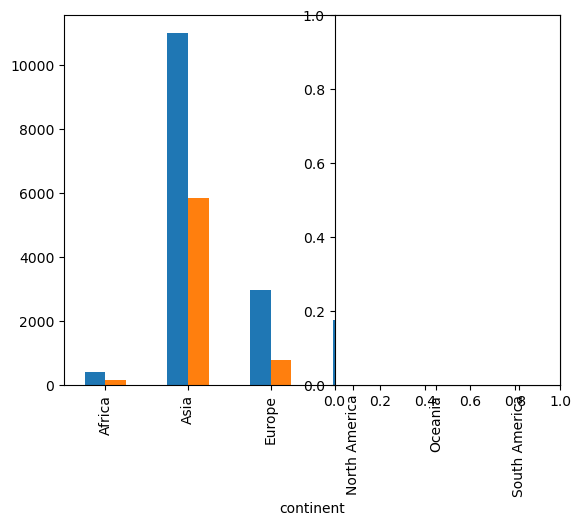

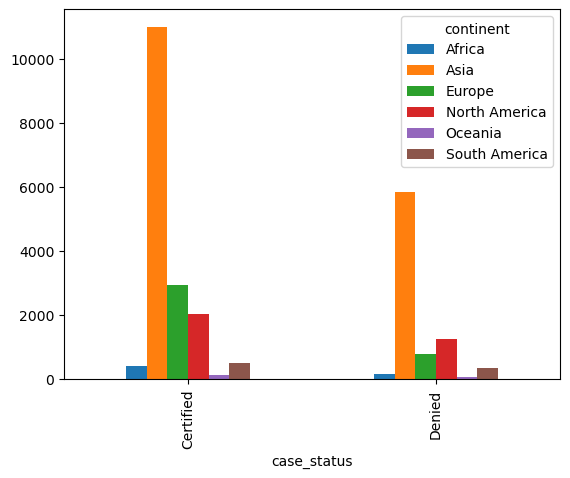

In [16]:
plt.subplot(1,2,1)
res1.plot(kind='bar')
plt.subplot(1,2,2)
res2.plot(kind='bar')

In [17]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
col=[col3,col2]
res1=(pd.crosstab(col,col1))
res1


continent                          Africa  Asia  Europe  North America  \
education_of_employee case_status                                        
Bachelor's            Certified        81  4407    1040            641   
                      Denied           62  2761     259            584   
Doctorate             Certified        43   780     788            207   
                      Denied           11   143      58             51   
High School           Certified        23   676     162            210   
                      Denied           43  1614     328            191   
Master's              Certified       250  5149     967            979   
                      Denied           38  1331     130            429   

continent                          Oceania  South America  
education_of_employee case_status                          
Bachelor's            Certified         38            160  
                      Denied            28            173  
Doctorate             Certified         19             75  
                      Denied             3             14  
High School           Certified         19             74  
                      Denied            17             63  
Master's              Certified         46            184  
                      Denied            22            109

<Axes: xlabel='education_of_employee,case_status'>

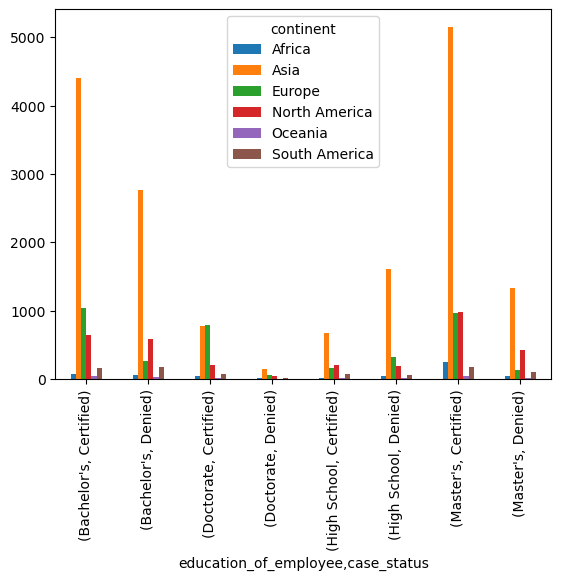

In [18]:
res1.plot(kind='bar')

**Numerical - Numerical**
- In order to plot numerical vs numerical we nedd to use scatter plots
- scatter plots will give the relation between two numerical columns
- it is under matplot

**plt.scatter**

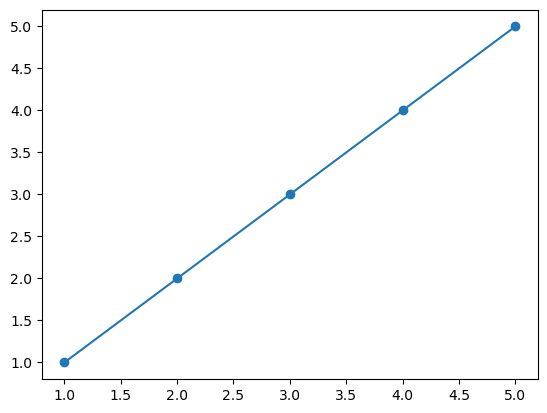

In [19]:
#y=x graph
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

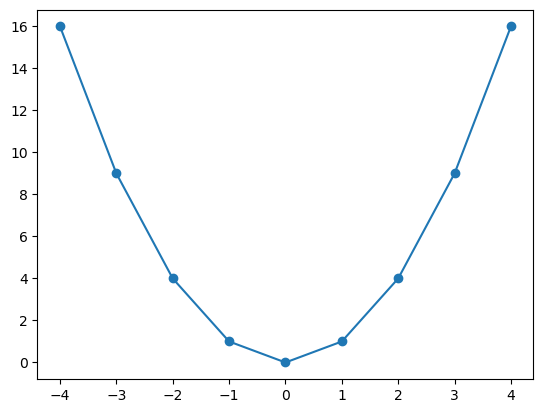

In [20]:
x=[ i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

    

In [21]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**scatter- plot-1**
- no_of_employees and yr_of_estab

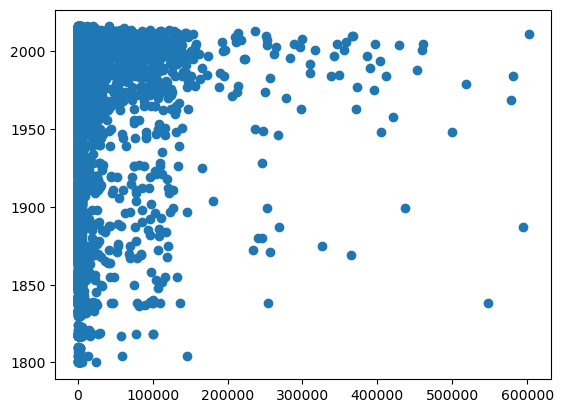

In [22]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
plt.show()

**observation**: no relation

**scatter plot-2**
- 'no_of_employees' and 'prevailing_wage'

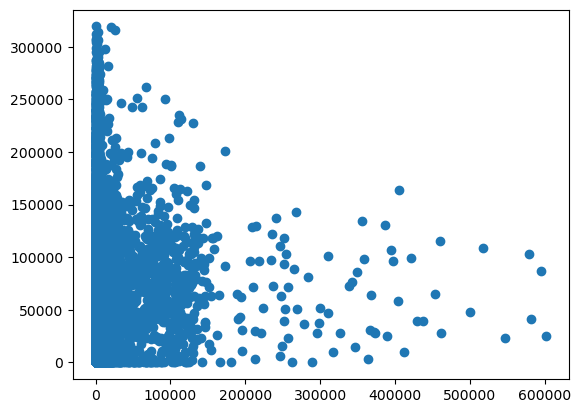

In [23]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

**Observation  :: No relation**

**scatter plot-3**
- 'yr_of_estab' and 'prevailing_wage'

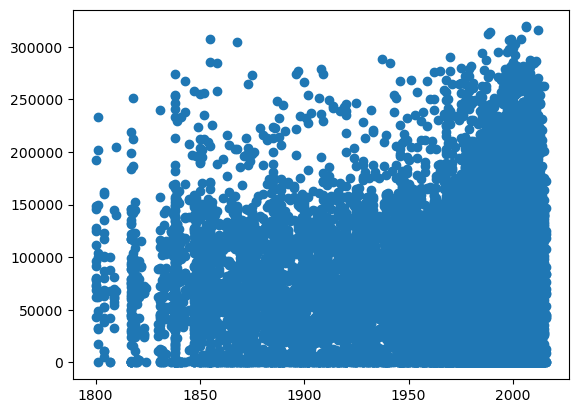

In [24]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

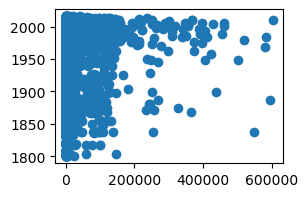

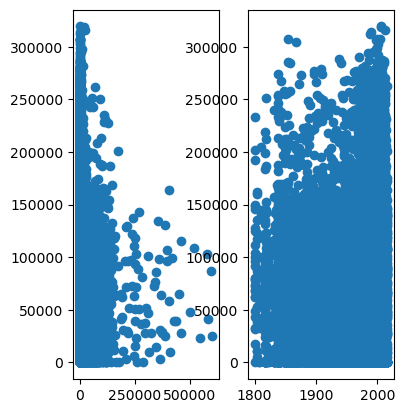

In [25]:
plt.figure(figsize=(10,2))
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)
plt.show()

col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)
plt.show()

<img fetchpriority="high" decoding="async" src="https://b1879915.smushcdn.com/1879915/wp-content/uploads/2021/06/Correlation-Coefficient-Formula.jpg?lossy=2&amp;strip=1&amp;webp=1" alt="Correlation Coefficient Formula" class="wp-image-455804" width="373" height="167" srcset="https://b1879915.smushcdn.com/1879915/wp-content/uploads/2021/06/Correlation-Coefficient-Formula.jpg?size=216x97&amp;lossy=2&amp;strip=1&amp;webp=1 216w, https://b1879915.smushcdn.com/1879915/wp-content/uploads/2021/06/Correlation-Coefficient-Formula.jpg?size=432x194&amp;lossy=2&amp;strip=1&amp;webp=1 432w, https://b1879915.smushcdn.com/1879915/wp-content/uploads/2021/06/Correlation-Coefficient-Formula.jpg?size=648x292&amp;lossy=2&amp;strip=1&amp;webp=1 648w, https://b1879915.smushcdn.com/1879915/wp-content/uploads/2021/06/Correlation-Coefficient-Formula.jpg?size=864x389&amp;lossy=2&amp;strip=1&amp;webp=1 864w">

- Person correlation coefficient will give the amount of relation between variables
- it is denoted with r
- r varies from -1 to 1
- For positive relation r varies from 0 to 1
- For negative relation r varies feom -1 to 0
- For n relation r approximately 0
- In python code we have **corr** function under pandas
- 

In [26]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**observation**
- The correlation value between no_of_employee and yr_of_estab approximately 0
   - Which indicates no relation
- The correlation value between no_of_employee and prevailing_wage approximately 0
   - Which indicates no relation
- The correlation value between prevailing_wage and yr_of_estab approximately 0
   - Which indicates no relation


**What happen if correlation is high**
- for that we will read wine quality dataset
- will perform the corr

In [27]:
wine_data=pd.read_csv(r"C:\Users\surya\NareshIT\Data_files\winequality_red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wine_data=wine_data.drop_duplicates()
#if you see first row NAN
wine_data.iloc[1:,:] # indexes are not in the order
#you need to work

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [29]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
len(wine_data.columns)

12

In [31]:
#correlation 12
#12*12
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**Heat map**
- heat map will provide the matrix representation of correlation value
- heat map represent values in color format
- different different values in different color
- beside matrix it will display color bar
- color bar means like as scale of values with color
-  IT is under sea-born package 

<Axes: >

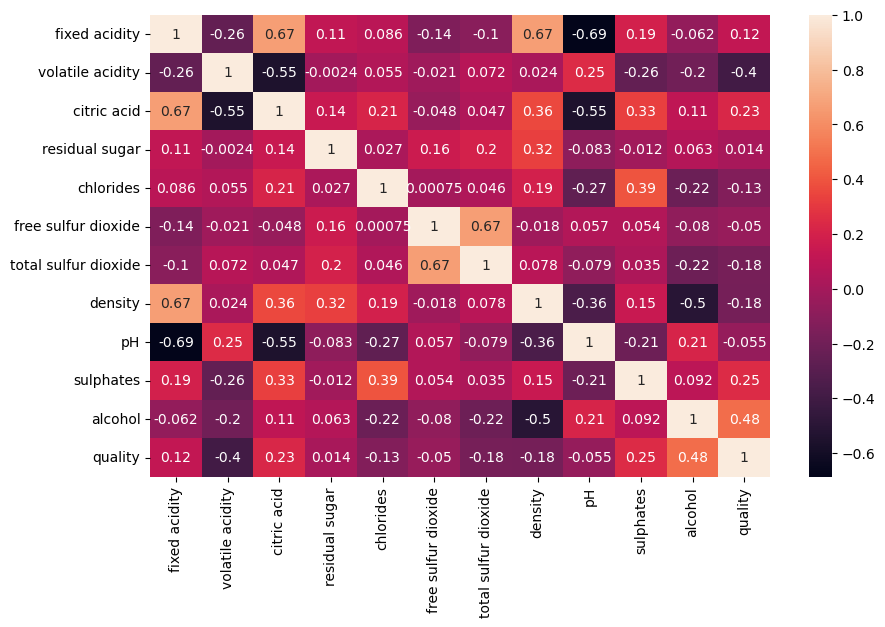

In [32]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

In [33]:
import seaborn as sns
sns.__version__

'0.13.2'

In [34]:
sns.__version__

'0.13.2'

In [40]:
visa_df=pd.read_csv(r"C:\Users\surya\NareshIT\ EDA_python\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


<Axes: >

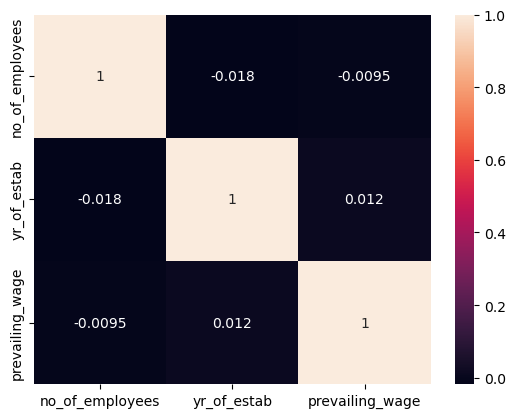

In [44]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

In [45]:
#Draw the scatter plot for wine data columns
#which is having highest positive correlation
#which is having lowest negative correlation

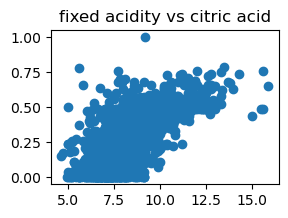

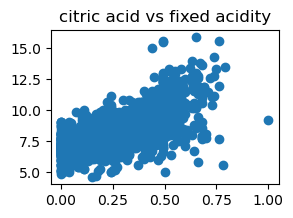

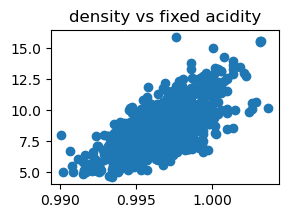

In [66]:
plt.figure(figsize=(10,2))
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('fixed acidity vs citric acid')
plt.show()
######################################################
plt.figure(figsize=(10,2))
col1=wine_data['citric acid']
col2=wine_data['fixed acidity']
plt.subplot(1,3,2).scatter(col1,col2)
plt.title('citric acid vs fixed acidity')
plt.show()
###########################################################
plt.figure(figsize=(10,2))
col1=wine_data['density']
col2=wine_data['fixed acidity']
plt.subplot(1,3,3).scatter(col1,col2)
plt.title('density vs fixed acidity')
plt.show()